### Customer Shopping Behavior Analysis

**Project Overview**

Goal

To understand how customers shop, what influences their spending habits, and how different factors (like age, gender, season, or discounts) affect sales and loyalty — so the business can make smarter marketing and product decisions.

**Understanding data**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load dataset
df = pd.read_csv("customer_shopping_behavior.csv")

print(df.head(11).to_string())

    Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)       Location Size      Color  Season  Review Rating Subscription Status   Shipping Type Discount Applied Promo Code Used  Previous Purchases Payment Method Frequency of Purchases
0             1   55   Male         Blouse     Clothing                     53       Kentucky    L       Gray  Winter            3.1                 Yes         Express              Yes             Yes                  14          Venmo            Fortnightly
1             2   19   Male        Sweater     Clothing                     64          Maine    L     Maroon  Winter            3.1                 Yes         Express              Yes             Yes                   2           Cash            Fortnightly
2             3   50   Male          Jeans     Clothing                     73  Massachusetts    S     Maroon  Spring            3.1                 Yes   Free Shipping              Yes             Yes                  2

In [41]:
df.shape

(3900, 18)

In [42]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [43]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [44]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [45]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [46]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:\n", numeric_cols)
print("\nCategorical Columns:\n", categorical_cols)

# Quick view of unique value counts for categorical columns
print("\nUnique Value Counts (Categorical):\n")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Numeric Columns:
 ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

Categorical Columns:
 ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

Unique Value Counts (Categorical):

Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


**Data Cleaning**

In [47]:
# Fill missing Review Ratings with average rating
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

# Check again for missing values
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values After Cleaning:
 Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


C:\Users\evana\AppData\Local\Temp\ipykernel_37872\1690154820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)


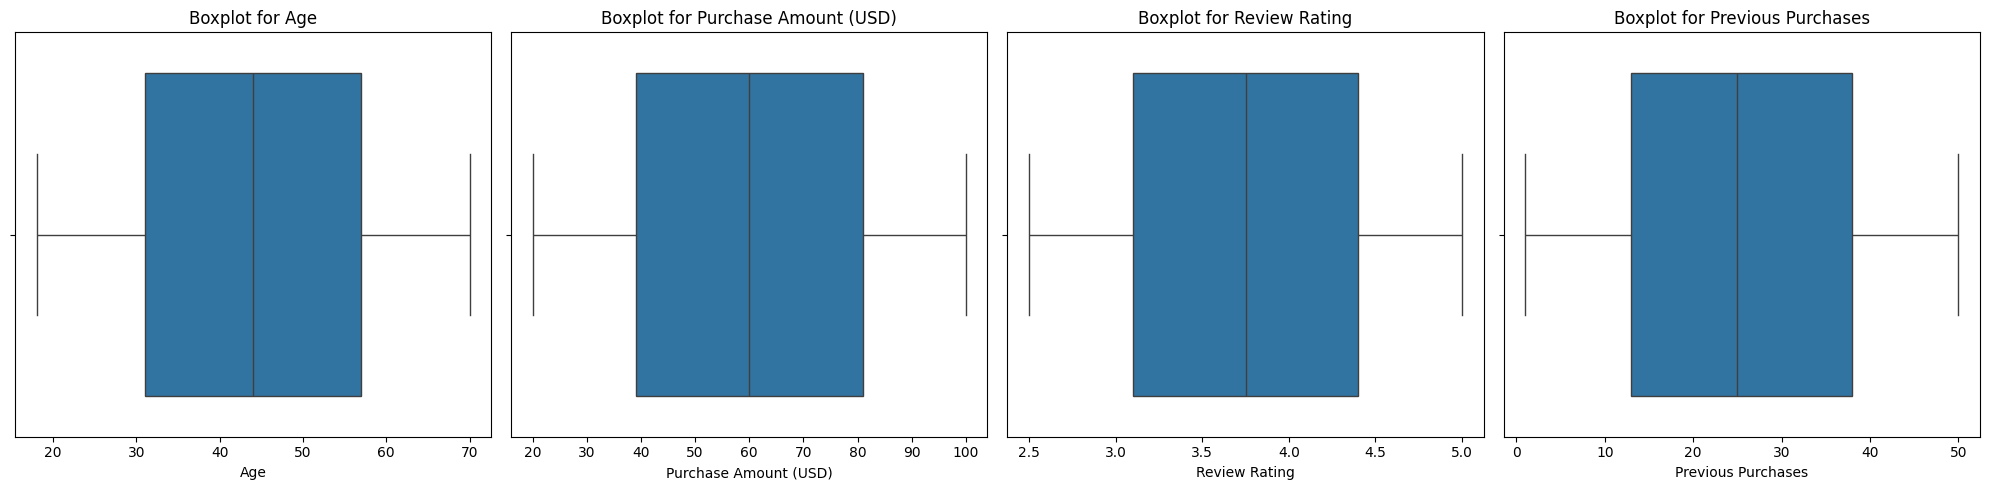

In [ ]:
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(20, 5))  # 1 row, multiple columns

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

The boxplots show that no columns have extreme outliers — all values are inside normal rang

**Explotary Data Analysis (EDA)**

In [49]:
# Numeric summary
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.713573,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.750065,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [50]:
# Categorical summary
df.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


* The average age of customers is about 44 years.

* The average purchase amount is around $60, with the highest being $100.

* Most people rated products around 3.7 out of 5.

* The average previous purchases are about 25 times.

* For categories, Clothing and Spring season appear most often.

* Most customers have no subscription, and Free Shipping is the most used delivery type.

* PayPal is the most popular payment method.

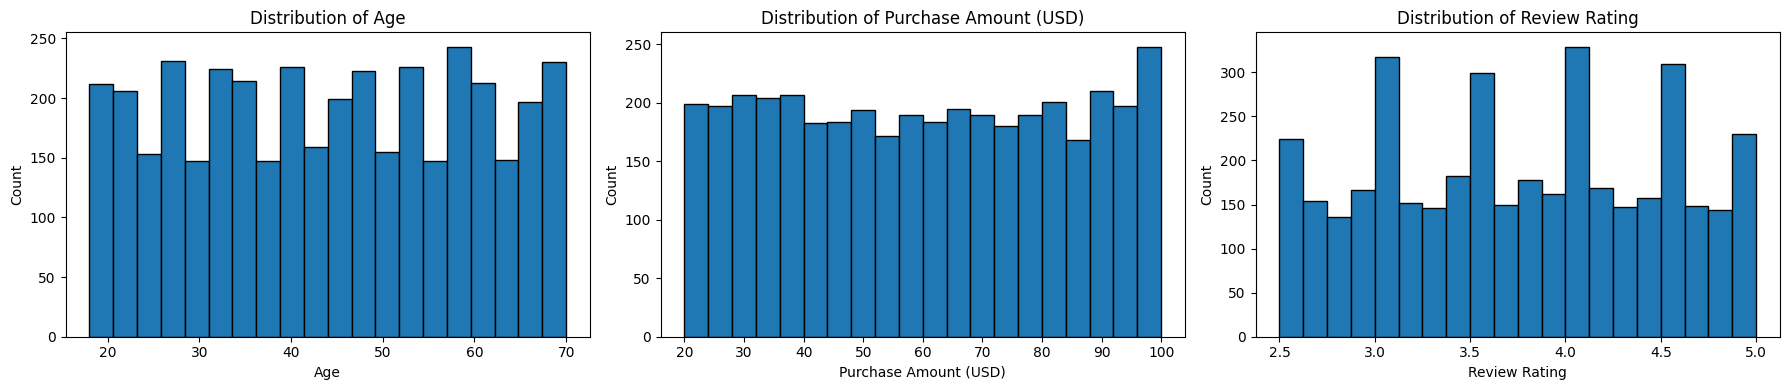

In [51]:
# 1. Combined distribution of numeric columns in one figure
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating']
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 4))  # 1 row, multiple columns

for ax, col in zip(axes, numeric_cols):
    ax.hist(df[col], bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

* Age: Customers are spread evenly from 18–70 years old, meaning all age groups shop almost equally.

* Purchase Amount: Most purchases are between $20–$100, with many customers buying around $60–$80.

* Review Rating: Most ratings are between 3 and 4.5 — people are mostly satisfied, not extreme.

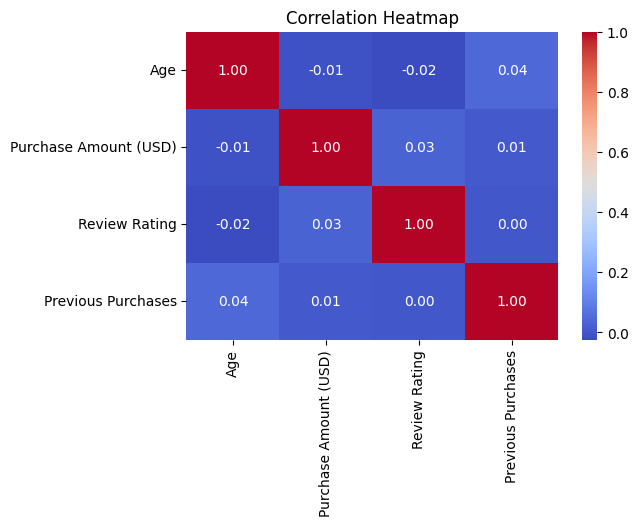

In [58]:
# Correlation Analysis

plt.figure(figsize=(6,4))
corr = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows that all numeric values have very weak correlations (close to 0).

Age and Purchase Amount: almost no relation — older or younger customers spend about the same.

Review Rating and Purchase Amount: very small positive link — people who spend more give slightly better ratings.

Previous Purchases: not strongly related to other factors — returning customers spend similarly to new ones.

**Business Insights**

* Understanding Our Customers

How many customers are included in the data, and what is their age range?

In [59]:
total_customers = df['Customer ID'].nunique()
min_age = df['Age'].min()
max_age = df['Age'].max()

print("Total Customers:", total_customers)
print("Age Range:", min_age, "to", max_age)

Total Customers: 3900
Age Range: 18 to 70


Which age group shops the most and spends the highest amount?

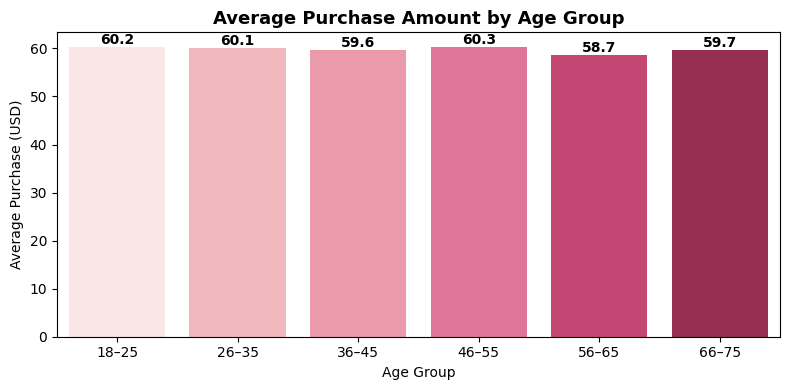

,Age Group,Purchase Amount (USD)
0,18–25,60.201646
1,26–35,60.132450
2,36–45,59.620027
3,46–55,60.332447
4,56–65,58.716378
5,66–75,59.704918


In [ ]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '66–75']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Average purchase by age group
age_group_stats = df.groupby('Age Group', observed=False)['Purchase Amount (USD)'].mean().reset_index()

# Custom color palette 
custom_colors = ['#FDE2E4', '#FAB0B7', '#F88DA3', '#F06595', '#D6336C', '#A61E4D']

# Plot
plt.figure(figsize=(8,4))
ax = sns.barplot(
    x='Age Group', 
    y='Purchase Amount (USD)', 
    hue='Age Group', 
    data=age_group_stats, 
    palette=custom_colors, 
    legend=False
)

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f'),  # one decimal point
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black', fontweight='bold'
    )

plt.title('Average Purchase Amount by Age Group', fontsize=13, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase (USD)')
plt.tight_layout()
plt.show()

# Display the data
age_group_stats

All age groups spend almost the same — around $59–$61 on average.

This means shopping habits are balanced across ages — no single group spends much more or less.

Do men or women make more purchases on average?

Average Purchase Amount by Gender:

   Gender  Purchase Amount (USD)
0  Female              60.249199
1    Male              59.536199


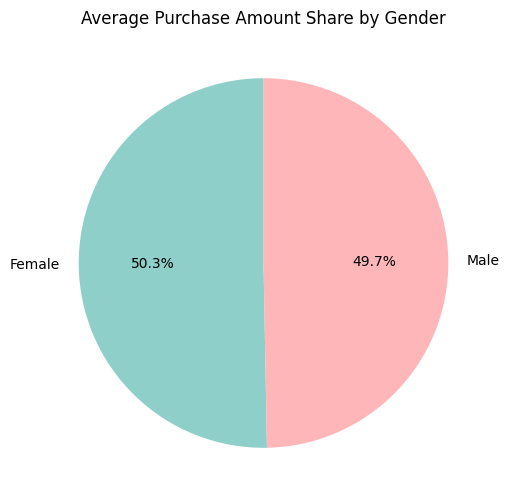

In [66]:
# Calculate average purchase amount by gender
gender_spending = df.groupby('Gender', observed=False)['Purchase Amount (USD)'].mean().reset_index()

# Print the result
print("Average Purchase Amount by Gender:\n")
print(gender_spending)

# Graph (Pie chart for clear comparison)
plt.figure(figsize=(6,6))
plt.pie(gender_spending['Purchase Amount (USD)'], labels=gender_spending['Gender'],
        autopct='%1.1f%%', startangle=90, colors=['#8ECFC9', '#FFB6B9'])
plt.title('Average Purchase Amount Share by Gender')
plt.show()

Both men and women spend almost the same on average, around $60.

Women spend slightly more (50.3%) than men, but the difference is very small — so shopping habits are balanced between genders.

Which location has the most active shoppers?

Top 10 Locations with Most Purchases:

     Location  Number of Purchases
0     Montana                   96
1  California                   95
2       Idaho                   93
3    Illinois                   92
4     Alabama                   89
5   Minnesota                   88
6    New York                   87
7      Nevada                   87
8    Nebraska                   87
9    Delaware                   86


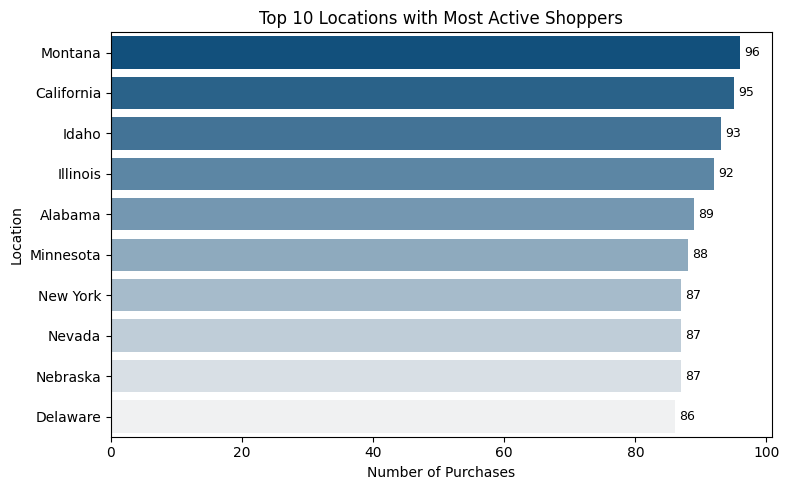

In [ ]:
# ✅ Top 10 Locations with Monochromatic Color Gradient

# Count purchases per location
location_counts = df['Location'].value_counts().head(10).reset_index()
location_counts.columns = ['Location', 'Number of Purchases']

print("Top 10 Locations with Most Purchases:\n")
print(location_counts)

# Create a monochromatic gradient palette 
mono_palette = sns.light_palette("#1f77b4", n_colors=len(location_counts), reverse=True)  # base blue tone

# Graph: Horizontal bar chart (professional, single-color shades)
plt.figure(figsize=(8,5))
ax = sns.barplot(y='Location', x='Number of Purchases', hue='Location',
                 data=location_counts, palette=mono_palette, legend=False)

# Add data labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title('Top 10 Locations with Most Active Shoppers')
plt.xlabel('Number of Purchases')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


The top locations with the most shoppers are Montana, California, Idaho, and Illinois.

This means these places have very active customers — possibly strong markets for product promotion or special offers.

* Exploring What They Buy

What are the most popular items and categories among customers?

Top 10 Most Purchased Items:

  Item Purchased  Count
0         Blouse    171
1          Pants    171
2        Jewelry    171
3          Shirt    169
4          Dress    166
5        Sweater    164
6         Jacket    163
7           Coat    161
8     Sunglasses    161
9           Belt    161


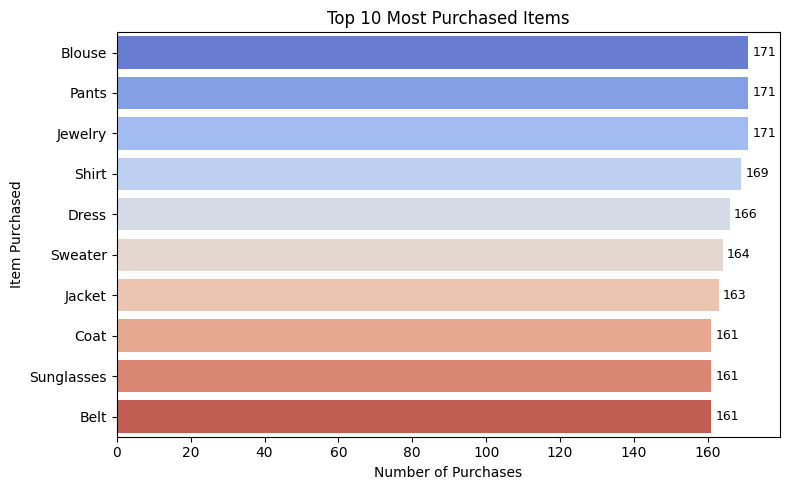


Category Share:

      Category  Count
0     Clothing   1737
1  Accessories   1240
2     Footwear    599
3    Outerwear    324


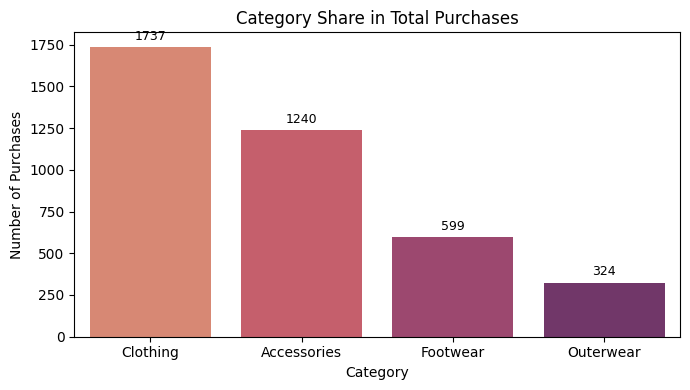

In [ ]:
# Top 10 items
top_items = df['Item Purchased'].value_counts().head(10).reset_index()
top_items.columns = ['Item Purchased', 'Count']

print("Top 10 Most Purchased Items:\n")
print(top_items)

# Graph 1: Horizontal bar chart (with data labels + unique professional colors)
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Count', y='Item Purchased', hue='Item Purchased',
                 data=top_items, palette='coolwarm', legend=False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title('Top 10 Most Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Purchased')
plt.tight_layout()
plt.show()

# Category share
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

print("\nCategory Share:\n")
print(category_counts)

# Graph 2: Vertical bar chart (different palette for variety)
plt.figure(figsize=(7,4))
ax2 = sns.barplot(x='Category', y='Count', hue='Category',
                  data=category_counts, palette='flare', legend=False)

# Add data labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title('Category Share in Total Purchases')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

The most purchased items are Blouse, Pants, and Jewelry, all with almost the same number of sales — around 170 each.

The Clothing category dominates with the largest area, meaning most customers shop for clothes. Accessories come second, followed by Footwear and Outerwear — which are less popular. So, clothing and accessories are the best-selling areas.

Which size and color do customers prefer the most?

Most Preferred Sizes:

  Size  Count
0    M   1755
1    L   1053
2    S    663
3   XL    429


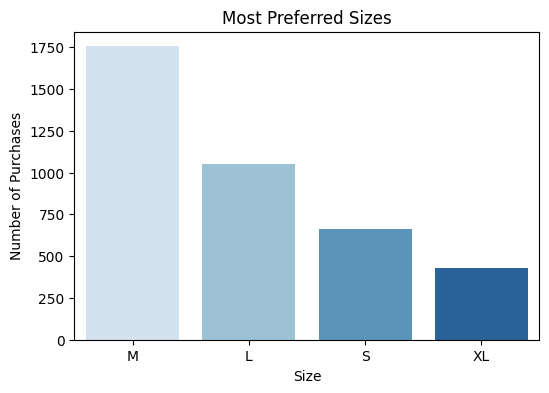


Top 5 Most Preferred Colors:

    Color  Count
0   Olive    177
1  Yellow    174
2  Silver    173
3    Teal    172
4   Green    169


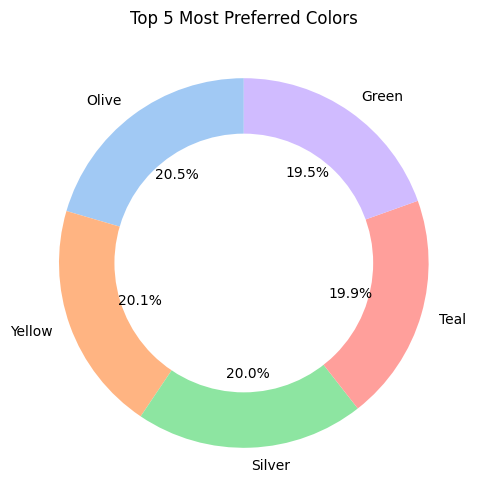

In [75]:
# Top sizes
size_counts = df['Size'].value_counts().reset_index()
size_counts.columns = ['Size', 'Count']

print("Most Preferred Sizes:\n")
print(size_counts)

# Graph 1: Bar chart for sizes
plt.figure(figsize=(6,4))
sns.barplot(x='Size', y='Count', hue='Size', data=size_counts, palette='Blues', legend=False)
plt.title('Most Preferred Sizes')
plt.xlabel('Size')
plt.ylabel('Number of Purchases')
plt.show()

# Top colors
color_counts = df['Color'].value_counts().head(5).reset_index()
color_counts.columns = ['Color', 'Count']

print("\nTop 5 Most Preferred Colors:\n")
print(color_counts)

# Graph 2: Donut chart for colors
plt.figure(figsize=(6,6))
plt.pie(color_counts['Count'], labels=color_counts['Color'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
# Create donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 5 Most Preferred Colors')
plt.show()

The most preferred size is Medium (M) — over 1,700 purchases, showing it fits most customers. Large (L) comes next, while Small (S) and XL are less popular.

The favorite colors are Olive, Yellow, and Silver, with Olive being slightly more popular than the rest.
This shows that most customers like medium-sized products in soft or natural colors.

On average, how much money do customers spend per purchase?

Average Purchase Amount per Customer: $59.76


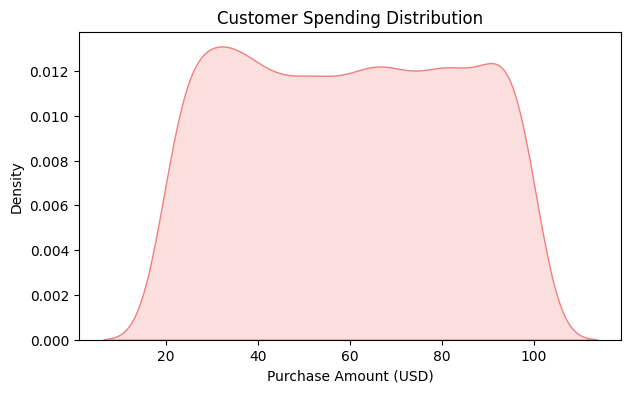

In [76]:
average_spending = df['Purchase Amount (USD)'].mean()
print(f"Average Purchase Amount per Customer: ${average_spending:.2f}")

# Graph: KDE plot to show spending distribution
plt.figure(figsize=(7,4))
sns.kdeplot(df['Purchase Amount (USD)'], fill=True, color='lightcoral')
plt.title('Customer Spending Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.show()

On average, customers spend about $59.76 per purchase.

The KDE graph shows that most people spend between $40 and $80, with very few spending below $20 or above $100.
So, spending is quite steady and evenly spread — no extreme low or high buyers.

* Season, Discount, and Promotion Impact

During which season do customers shop the most?

Purchases by Season:

   Season  Number of Purchases
0  Spring                  999
1    Fall                  975
2  Winter                  971
3  Summer                  955


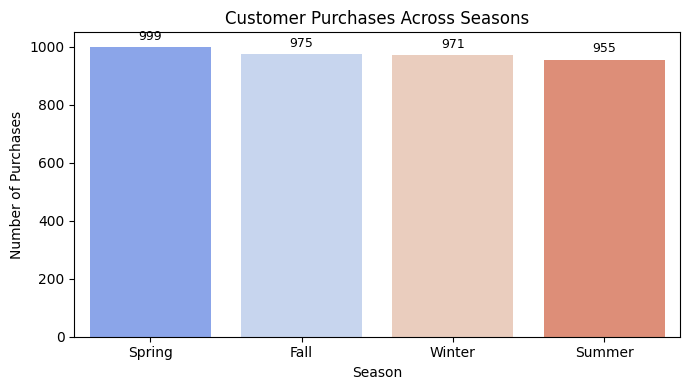

In [ ]:
season_counts = df['Season'].value_counts().reset_index()
season_counts.columns = ['Season', 'Number of Purchases']

print("Purchases by Season:\n")
print(season_counts)

# Bar chart with labels
plt.figure(figsize=(7,4))
ax = sns.barplot(x='Season', y='Number of Purchases', hue='Season',
                 data=season_counts, palette='coolwarm', legend=False)

# Add data labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title('Customer Purchases Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

The Spring season has the most purchases (999) — customers shop more during Spring.

Summer has the least shopping (955).
So, customers are most active in Spring and slightly less in the colder or hotter months.

Does offering discounts lead to higher purchase amounts?

Average Purchase Amount by Discount Status:

  Discount Applied  Purchase Amount (USD)
0               No              60.130454
1              Yes              59.279070


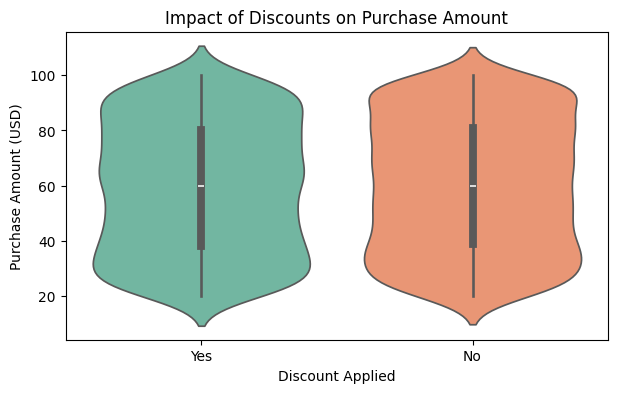

In [80]:
discount_effect = df.groupby('Discount Applied', observed=False)['Purchase Amount (USD)'].mean().reset_index()

print("Average Purchase Amount by Discount Status:\n")
print(discount_effect)

# Graph: Violin plot
plt.figure(figsize=(7,4))
sns.violinplot(x='Discount Applied', y='Purchase Amount (USD)', hue='Discount Applied',
               data=df, palette='Set2', legend=False)
plt.title('Impact of Discounts on Purchase Amount')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.show()


The average purchase amount is almost the same — about $60 with or without a discount.

The violin shape shows that the spending spread (range of amounts) is nearly identical for both groups.
So, giving discounts doesn’t really increase how much customers spend — it might attract buyers but doesn’t change the total purchase value much.

Do customers who use promo codes tend to spend more or less than those who don’t?

Average Purchase Amount by Promo Code Usage:

  Promo Code Used  Purchase Amount (USD)
0              No              60.130454
1             Yes              59.279070


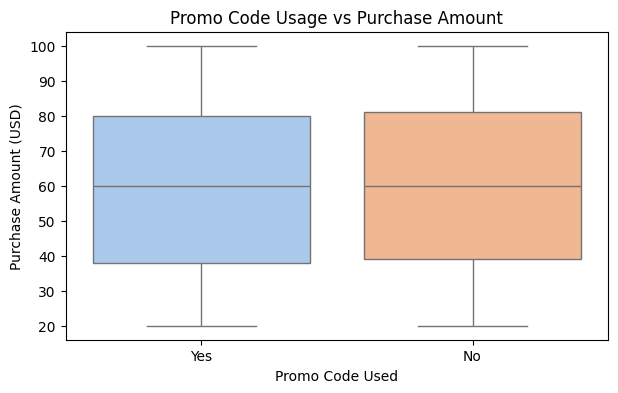

In [81]:
promo_effect = df.groupby('Promo Code Used', observed=False)['Purchase Amount (USD)'].mean().reset_index()

print("Average Purchase Amount by Promo Code Usage:\n")
print(promo_effect)

# Graph: Boxplot for comparison
plt.figure(figsize=(7,4))
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', hue='Promo Code Used',
            data=df, palette='pastel', legend=False)
plt.title('Promo Code Usage vs Purchase Amount')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()

Customers who used promo codes spent about $59.28, while those who didn’t use them spent about $60.13.

The boxplot shows both groups have almost the same spending range (around $20–$100).
So, promo codes don’t really make customers spend more — they mainly help attract buyers, not increase purchase value.

* Customer Loyalty & Experience

Do subscribed customers shop more frequently than non-subscribed ones?

Shopping Frequency by Subscription Status:

  Subscription Status Frequency of Purchases  Count
0                  No         Every 3 Months    430
1                  No              Quarterly    423
2                  No               Annually    412
3                  No              Bi-Weekly    407
4                  No                Monthly    404
5                  No            Fortnightly    389
6                  No                 Weekly    382
7                 Yes               Annually    160
8                 Yes                 Weekly    157
9                 Yes         Every 3 Months    154


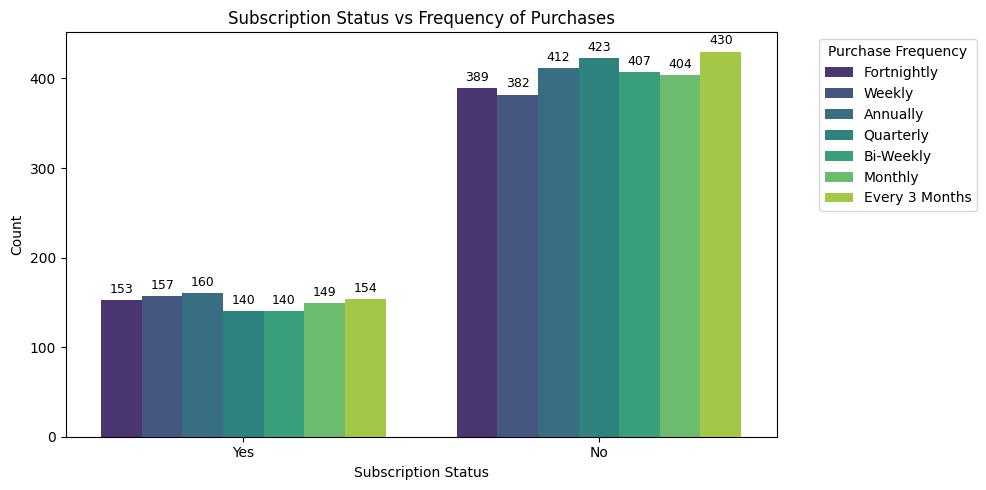

In [84]:
subscription_freq = df.groupby('Subscription Status', observed=False)['Frequency of Purchases'].value_counts().reset_index(name='Count')

print("Shopping Frequency by Subscription Status:\n")
print(subscription_freq.head(10))  # show sample

# Graph: Count plot
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Subscription Status', hue='Frequency of Purchases', data=df,
                   palette='viridis')

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title('Subscription Status vs Frequency of Purchases')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The graph clearly shows that non-subscribed customers shop more often than subscribed ones.

Subscribed customers (Yes) mostly shop annually or weekly, around 150–160 times, while non-subscribed customers (No) shop much more frequently — especially every 3 months (430) or quarterly (423).

This means that subscriptions don’t guarantee frequent shopping — many regular customers buy often even without a subscription.

How do review ratings vary among different products or categories?

Average Review Rating by Category:

      Category  Review Rating
0  Accessories       3.769799
1     Clothing       3.721849
2     Footwear       3.793406
3    Outerwear       3.745679


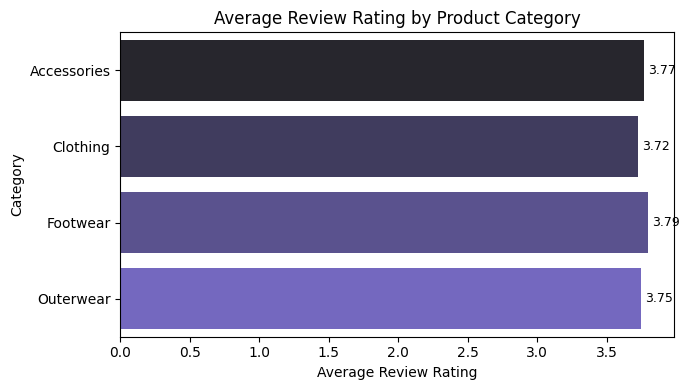

In [ ]:
category_ratings = df.groupby('Category', observed=False)['Review Rating'].mean().reset_index()

print("Average Review Rating by Category:\n")
print(category_ratings)

# Create a darker violet gradient palette for better contrast
mono_palette = sns.dark_palette("#6A5ACD", n_colors=len(category_ratings), reverse=False)

# Horizontal bar chart with professional gradient and visible labels
plt.figure(figsize=(7,4))
ax = sns.barplot(y='Category', x='Review Rating', hue='Category',
                 data=category_ratings, palette=mono_palette, legend=False)

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.title('Average Review Rating by Product Category')
plt.xlabel('Average Review Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

All product categories have similar review ratings — around 3.7 to 3.8 out of 5.

Footwear has the highest rating (3.79), showing customers are most happy with shoes and sandals.

Clothing has the lowest (3.72), but still close — meaning overall, customers are satisfied with all categories.

So, no big quality issues — but improving clothing quality a bit could make ratings even better.

Do customers who rate products highly tend to spend more?

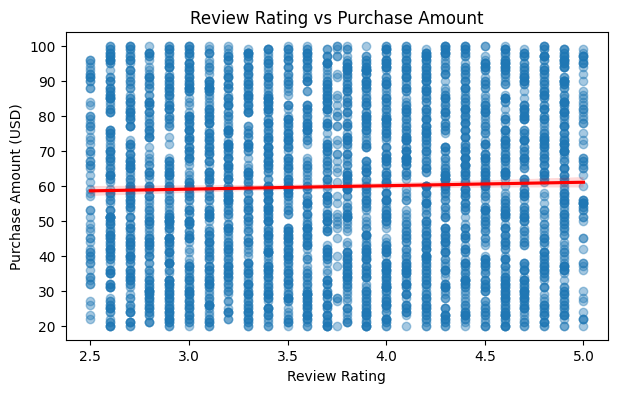

In [90]:
# Graph: Scatter plot with regression line
plt.figure(figsize=(7,4))
sns.regplot(x='Review Rating', y='Purchase Amount (USD)', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Review Rating vs Purchase Amount')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()

The scatter plot shows that there is no strong link between review rating and how much customers spend.

The red line (trend line) is almost flat, meaning even customers who give low or high ratings spend about the same — around $60.

So, spending doesn’t depend on satisfaction level — customers buy similarly whether they rate products high or low.

* Payment & Delivery Preferences

Which payment method is used the most by customers?

Most Used Payment Methods:

  Payment Method  Count
0         PayPal    677
1    Credit Card    671
2           Cash    670
3     Debit Card    636
4          Venmo    634
5  Bank Transfer    612


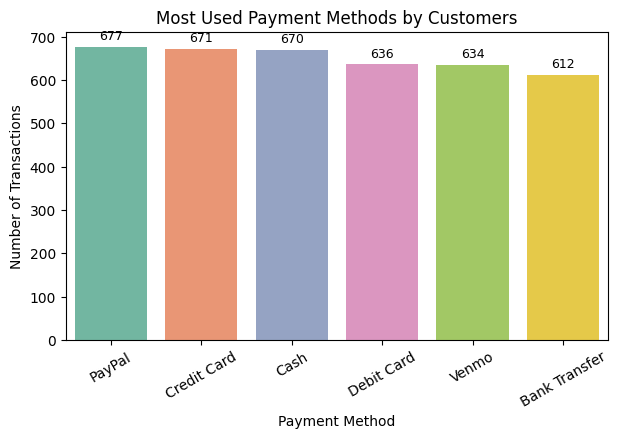

In [92]:
payment_counts = df['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

print("Most Used Payment Methods:\n")
print(payment_counts)

# Graph: Vertical bar chart with bright shades
plt.figure(figsize=(7,4))
ax = sns.barplot(x='Payment Method', y='Count', hue='Payment Method',
                 data=payment_counts, palette='Set2', legend=False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title('Most Used Payment Methods by Customers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=30)
plt.show()


Which type of shipping is preferred, and does it relate to how much they spend?

Most Preferred Shipping Types:

    Shipping Type  Count
0   Free Shipping    675
1        Standard    654
2    Store Pickup    650
3    Next Day Air    648
4         Express    646
5  2-Day Shipping    627


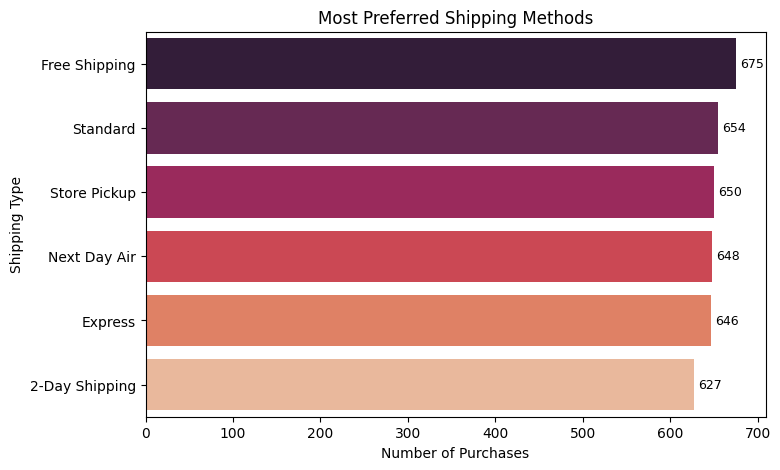

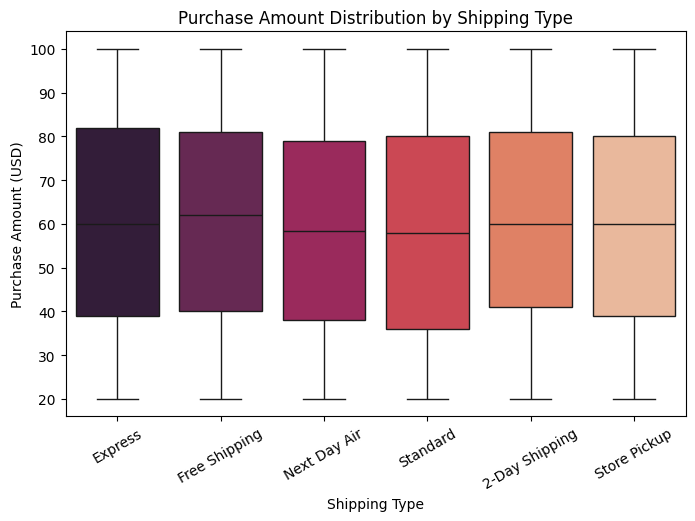

In [ ]:
shipping_counts = df['Shipping Type'].value_counts().reset_index()
shipping_counts.columns = ['Shipping Type', 'Count']

print("Most Preferred Shipping Types:\n")
print(shipping_counts)

# Distinct professional tones for each bar
unique_colors = sns.color_palette("rocket", n_colors=len(shipping_counts))

# Graph 1: Horizontal bar chart 
plt.figure(figsize=(8,5))
ax = sns.barplot(y='Shipping Type', x='Count', hue='Shipping Type',
                 data=shipping_counts, palette=unique_colors, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)
plt.title('Most Preferred Shipping Methods')
plt.xlabel('Number of Purchases')
plt.ylabel('Shipping Type')
plt.show()

# Graph 2: Boxplot 
plt.figure(figsize=(8,5))
sns.boxplot(x='Shipping Type', y='Purchase Amount (USD)', hue='Shipping Type',
            data=df, palette='rocket', legend=False)
plt.title('Purchase Amount Distribution by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=30)
plt.show()

The most preferred shipping option is Free Shipping (675 orders) — meaning customers really value cost-free delivery. Other popular ones include Standard (654) and Store Pickup (650).

The boxplot shows that people spend around the same no matter which shipping type they use — so shipping preference doesn’t affect spending much.

Business tip: Keep “Free Shipping” active since it attracts the most orders without reducing the average purchase amount.

####  **Based on all this, what strategies can help improve sales and customer loyalty?**

**Key Insights from the Analysis**

1. **Customer Demographics**

   * We have **3,900 customers**, mostly between **18–70 years old**.
   * Spending is **balanced across all age groups** — everyone spends around $60.
   * **Women** spend slightly more than men, but only by a small margin.

2. **Top Locations**

   * **Montana, California, and Idaho** are the strongest shopping regions — these areas have the most active buyers.

3. **Product Trends**

   * **Clothing** is the top-selling category, followed by **Accessories**.
   * Most popular items are **Blouse, Pants, and Jewelry** — strong repeat sellers.
   * Most preferred **size** is **Medium (M)**, and popular **colors** include **Olive, Yellow, and Silver**.

4. **Seasonal Insights**

   * **Spring** is the busiest season for shopping.
   * Sales drop slightly during **Summer**, meaning promotions or seasonal discounts could help maintain demand.

5. **Discounts & Promotions**

   * Discounts and promo codes **do not significantly increase spending**.
   * They might attract buyers but don’t make customers spend more.

6. **Loyalty & Subscriptions**

   * Non-subscribed customers actually **shop more frequently** than subscribed ones.
   * This means the subscription program isn’t encouraging repeat purchases — it may need redesigning or added benefits (like points, early access, etc.).

7. **Payment & Shipping**

   * Most customers use **PayPal** and **Free Shipping**, which are both convenient and popular.
   * Spending is similar across all shipping types — fast delivery doesn’t make customers spend more, but **free shipping** attracts the most orders.


**Business Strategy Suggestions**

* Spend more on ads in the states where you have the most buyers, like Montana, California, and Idaho.

* Keep extra clothes and accessories in stock, and offer more deals on them, since these bring in the most money.

* Start Spring sales and special customer rewards early.

* Make subscriptions better by giving more rewards or offers that match what each person likes.

* Always offer free shipping — it’s a big reason why people buy.

* Use the shopping data to send marketing emails that show items and deals in the colors or sizes people want.